In [1]:
import datetime as dt
import matplotlib .pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

ModuleNotFoundError: No module named 'matplotlib.pyplot'

In [10]:
style.use('ggplot')
x = dt.datetime.now()
start=dt.datetime(2000,1,1)
end=dt.datetime(x.year,x.month,x.day)


In [12]:
df=web.DataReader('SBIN.NS','yahoo',start,end)
print(df.tail())
df.to_csv('sbi.csv')

                  High         Low   Open       Close      Volume   Adj Close
Date                                                                         
2021-05-04  362.899994  350.200012  355.0  351.500000  57749307.0  351.500000
2021-05-05  357.450012  348.000000  356.5  355.399994  40872501.0  355.399994
2021-05-06  359.350006  350.549988  358.0  355.549988  36294427.0  355.549988
2021-05-07  362.000000  353.000000  357.5  358.250000  38357618.0  358.250000
2021-05-10  367.000000  358.799988  360.5  363.799988  26489755.0  363.799988


In [ ]:
df=pd.read_csv('sbi.csv',parse_dates=True,index_col=0)
print(df.head())

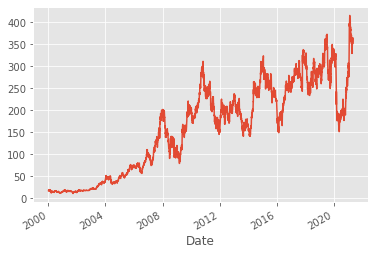

In [19]:
df['Adj Close'].plot()
plt.show()